
# 📊 M4.3 Seaborn 介紹與統計圖表

本課程介紹Python高級統計可視化庫Seaborn。Seaborn建立在Matplotlib的基礎上，提供更高層次的接口來繪製具有統計意義的精美圖表。相比Matplotlib，Seaborn具有更現代的外觀、更豐富的調色板選擇，以及專為統計分析設計的各種圖表類型。我們將探索Seaborn的基本使用方法和各種統計可視化功能。


## 🎯 教學目標

- 🔍 了解Seaborn庫的特點和設計理念
- 🎨 掌握Seaborn的基本風格和調色板設置
- 📊 學習Seaborn的統計圖表功能和應用
- 📈 探索如何使用Seaborn展示複雜的數據關係

In [57]:
# 環境設置
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# 忽略警告信息
warnings.filterwarnings('ignore')

# 設置隨機種子確保結果可重現
np.random.seed(42)

In [98]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# # 設置可視化風格
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# 微軟正黑體或思源黑體路徑 (請依你電腦為準)
font_path = "C:/Windows/Fonts/msjh.ttc"  # 或 simsun.ttc, NotoSansCJK, 等

# 建立 FontProperties
font_prop = fm.FontProperties(fname=font_path)

# 設定 matplotlib 全域字型（包括標題、座標軸、legend）
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 避免負號亂碼

# 設置顯示選項
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 12)
pd.set_option('display.width', 100)
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', '{:.2f}'.format)


## 📊 1. Seaborn 基本介紹與風格設置

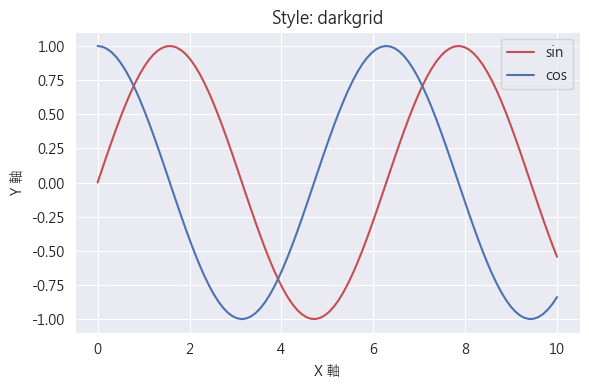

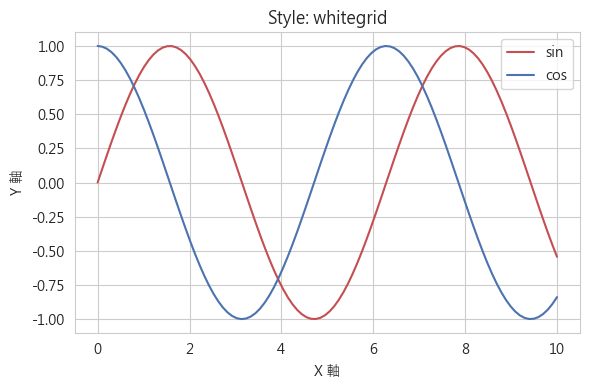

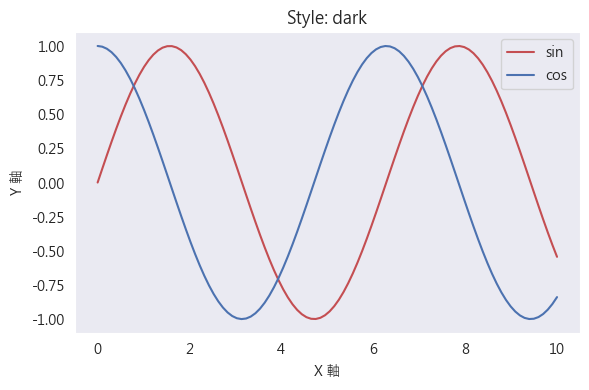

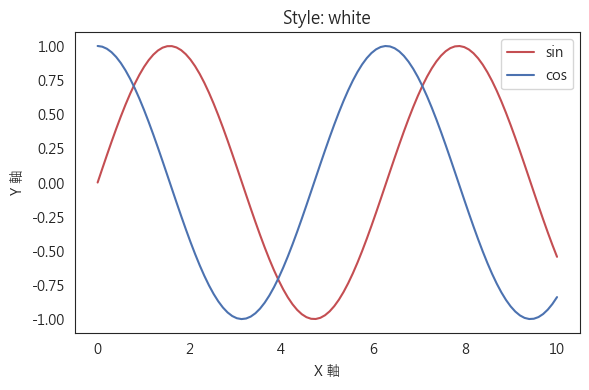

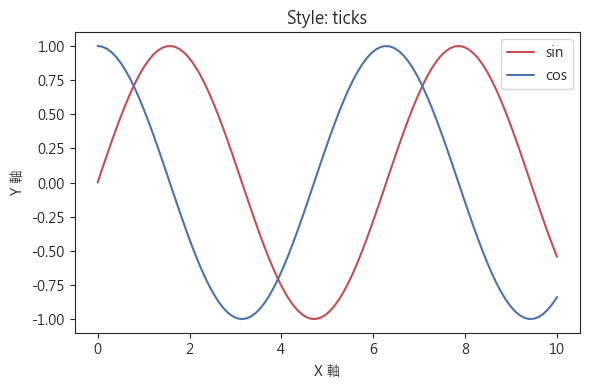

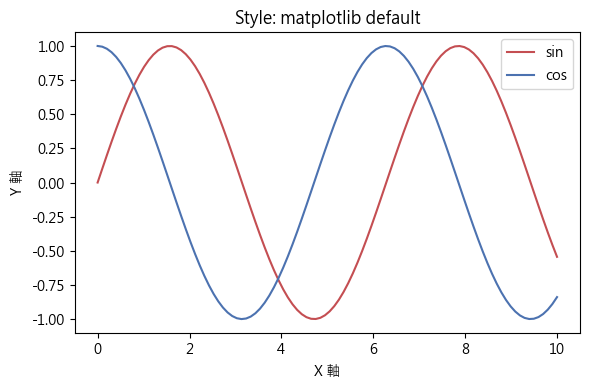

In [111]:
# 1.1 Seaborn的風格主題
# 展示Seaborn的五種基本風格：darkgrid, whitegrid, dark, white, ticks

# 準備資料
x = np.linspace(0, 10, 100)

# Seaborn 樣式
styles = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']
for style in styles:
    sns.set_style(style)
    plt.rcParams['font.family'] = font_prop.get_name()
    plt.rcParams['axes.unicode_minus'] = False  # 避免負號亂碼

    plt.figure(figsize=(6, 4))
    plt.plot(x, np.sin(x), 'r', label='sin')
    plt.plot(x, np.cos(x), 'b', label='cos')
    plt.title(f'Style: {style}')
    plt.xlabel('X 軸')
    plt.ylabel('Y 軸')
    plt.legend()
    # plt.grid(True)
    plt.tight_layout()
    plt.show()

# Matplotlib default
plt.style.use('default')
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 避免負號亂碼

plt.figure(figsize=(6, 4))
plt.plot(x, np.sin(x), 'r', label='sin')
plt.plot(x, np.cos(x), 'b', label='cos')
plt.title('Style: matplotlib default')
plt.xlabel('X 軸')
plt.ylabel('Y 軸')
plt.legend()
# plt.grid(True)
plt.tight_layout()
plt.show()






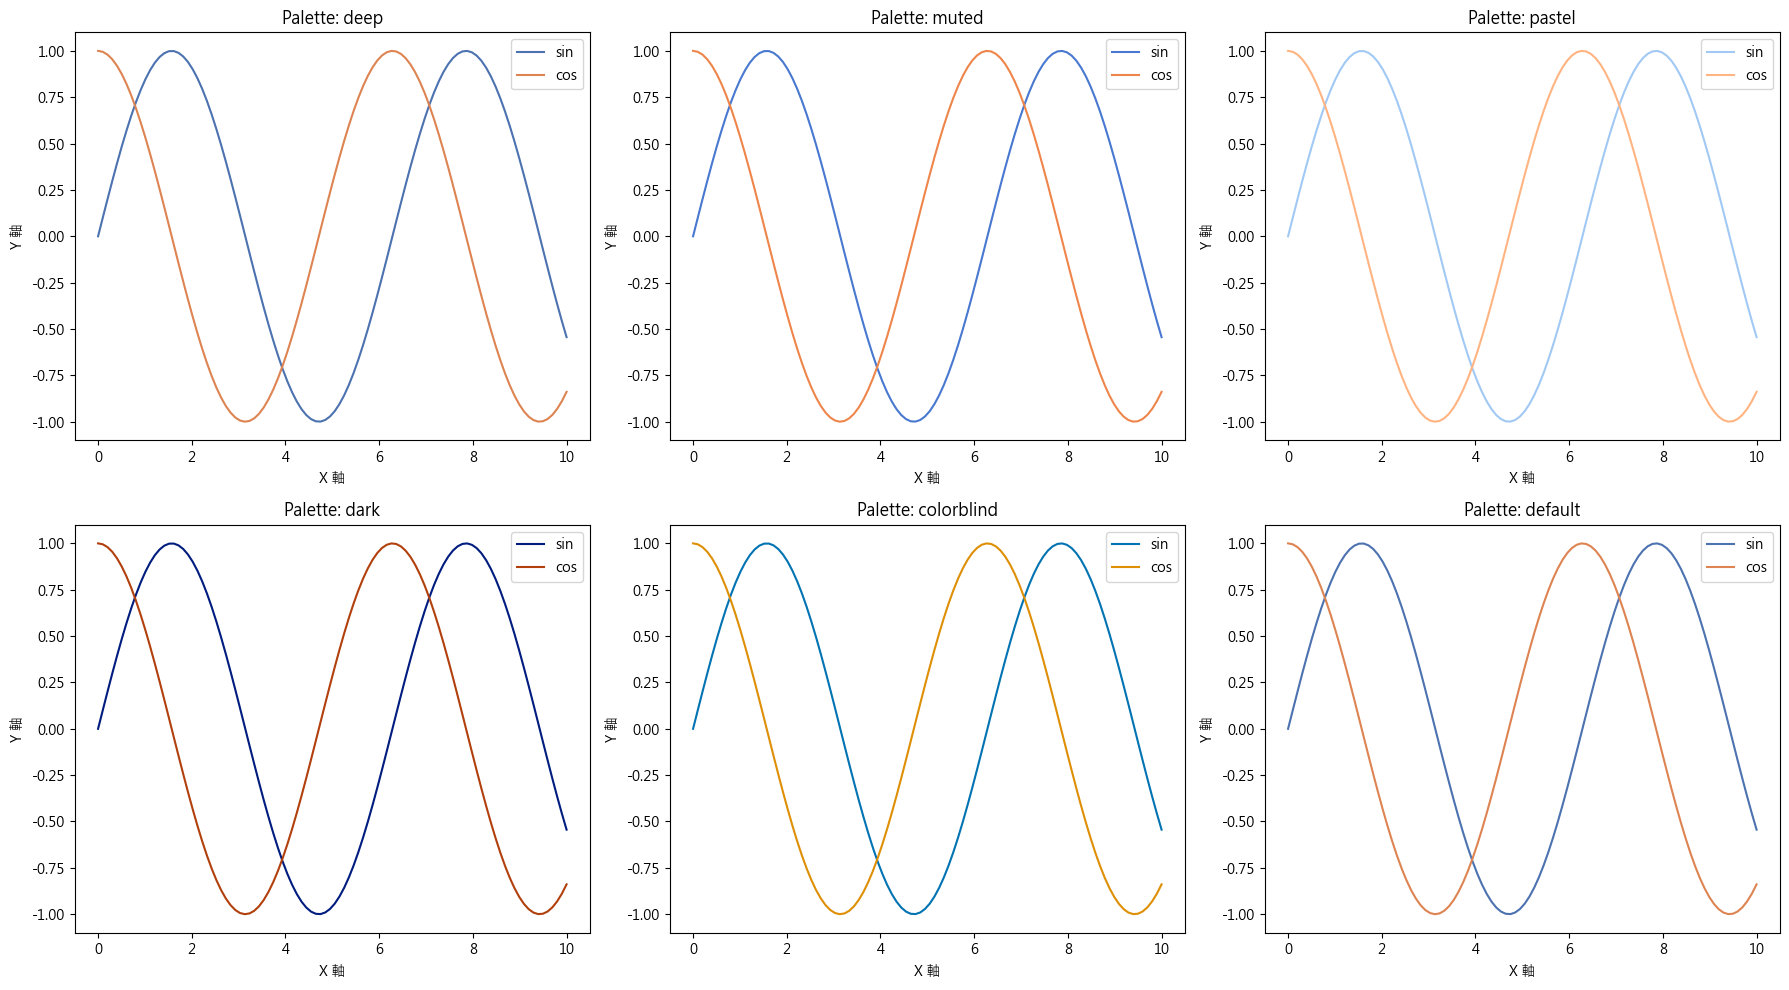

In [ ]:
# 1.2 Seaborn的調色板
# 展示Seaborn的各種調色板

palettes = ['deep', 'muted', 'pastel', 'dark', 'colorblind']
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

x = np.linspace(0, 10, 100)

for i, palette in enumerate(palettes):
    sns.set_palette(palette)  # Set the palette for each subplot
    colors = sns.color_palette(palette)
    
    axes[i].plot(x, np.sin(x), color=colors[0], label='sin')
    axes[i].plot(x, np.cos(x), color=colors[1], label='cos')
    axes[i].set_title(f'Palette: {palette}')
    axes[i].set_xlabel('X 軸')
    axes[i].set_ylabel('Y 軸')
    axes[i].legend()

# 重置為最後一個調色板展示原始matplotlib調色板
sns.set_palette('deep')
colors = sns.color_palette('deep')
axes[5].plot(x, np.sin(x), color=colors[0], label='sin')
axes[5].plot(x, np.cos(x), color=colors[1], label='cos')
axes[5].set_title('Palette: default')
axes[5].set_xlabel('X 軸')
axes[5].set_ylabel('Y 軸')
axes[5].legend()

plt.tight_layout()
plt.show()

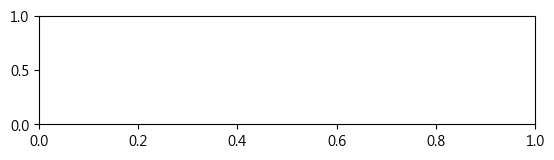

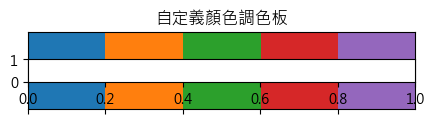

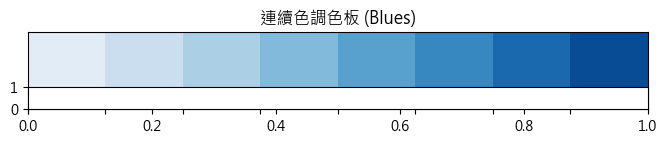

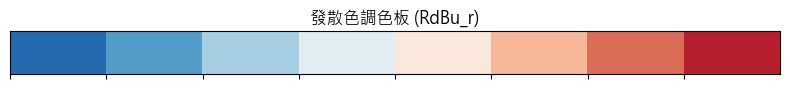

In [118]:
# 1.3 自定義調色板和顏色映射

# 使用自定義顏色創建調色板
custom_palette = sns.color_palette(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])

# 創建連續色彩映射的調色板
sequential_palette = sns.color_palette("Blues", 8)
diverging_palette = sns.color_palette("RdBu_r", 8)

# plt.figure(figsize=(15, 8))

# 展示自定義調色板
plt.subplot(3, 1, 1)
sns.palplot(custom_palette)
plt.title('自定義顏色調色板')

# 展示連續調色板
plt.subplot(3, 1, 2)
sns.palplot(sequential_palette)
plt.title('連續色調色板 (Blues)')

# 展示發散調色板
plt.subplot(3, 1, 3)
sns.palplot(diverging_palette)
plt.title('發散色調色板 (RdBu_r)')

plt.tight_layout()
plt.show()

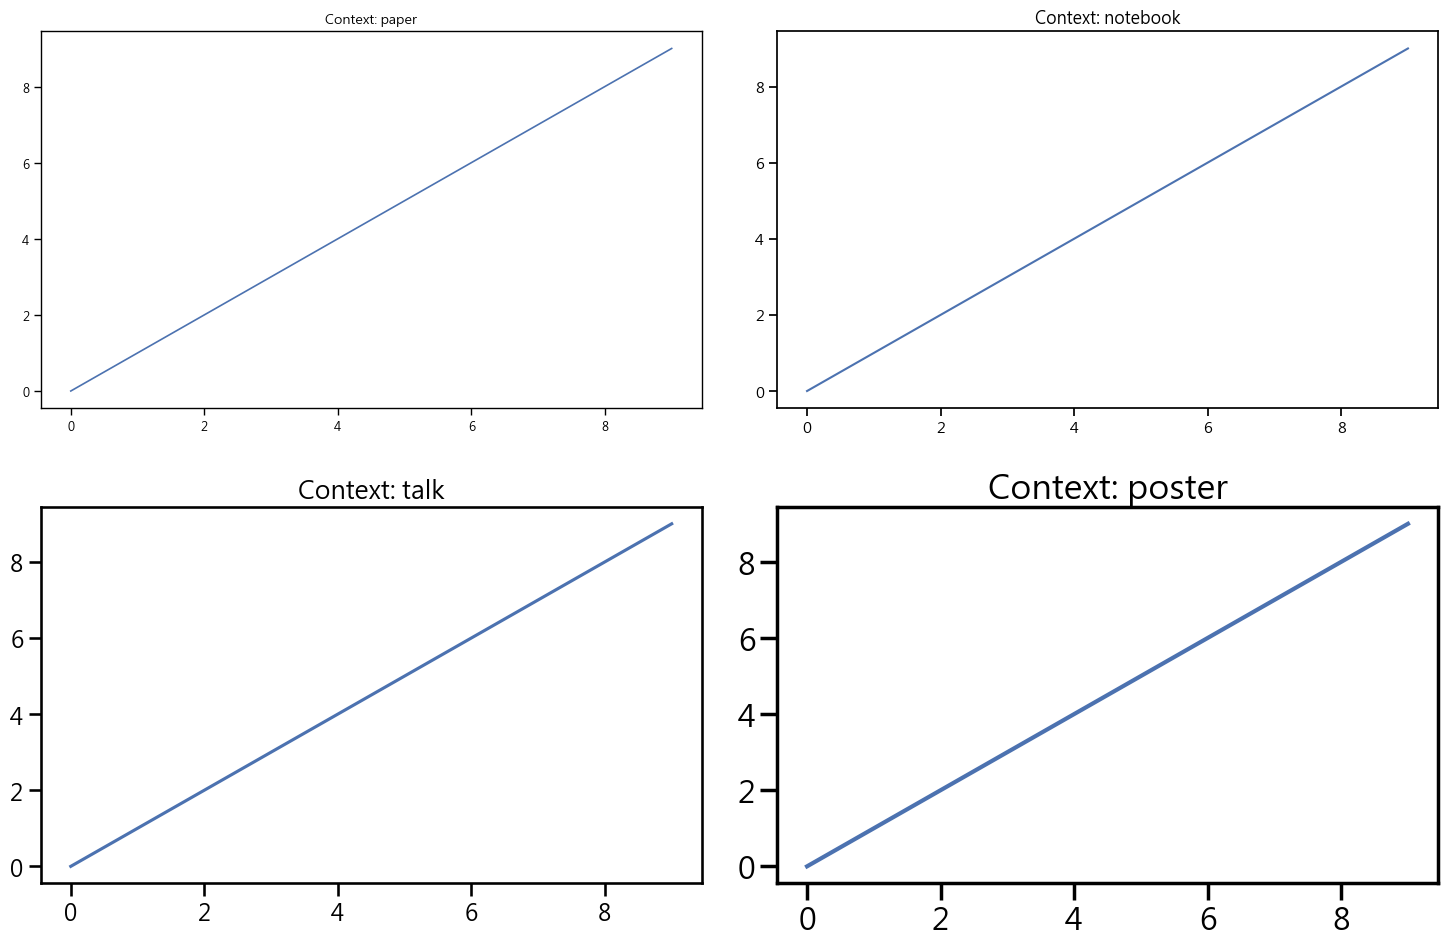

In [119]:
# 1.4 Seaborn繪圖的上下文設置

# 展示不同的上下文設置(context)
contexts = ['paper', 'notebook', 'talk', 'poster']

plt.figure(figsize=(15, 10))
for i, context in enumerate(contexts):
    sns.set_context(context)
    plt.subplot(2, 2, i+1)
    sns.lineplot(x=np.arange(10), y=np.arange(10))
    plt.title(f'Context: {context}')

plt.tight_layout()
plt.show()

In [120]:
# 1.5 載入Seaborn示例數據集
# Seaborn提供多個內建數據集用於示例

# 顯示可用的數據集
print("Seaborn提供的內建數據集:")
seaborn_datasets = sns.get_dataset_names()
print(seaborn_datasets)

# 載入幾個常用的數據集
tips = sns.load_dataset('tips')
iris = sns.load_dataset('iris')
titanic = sns.load_dataset('titanic')

print("\nTips數據集前5行:")
print(tips.head())

print("\nIris數據集前5行:")
print(iris.head())

print("\nTitanic數據集前5行:")
print(titanic.head())

Seaborn提供的內建數據集:
['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']

Tips數據集前5行:
   total_bill  tip     sex smoker  day    time  size
0       16.99 1.01  Female     No  Sun  Dinner     2
1       10.34 1.66    Male     No  Sun  Dinner     3
2       21.01 3.50    Male     No  Sun  Dinner     3
3       23.68 3.31    Male     No  Sun  Dinner     2
4       24.59 3.61  Female     No  Sun  Dinner     4

Iris數據集前5行:
   sepal_length  sepal_width  petal_length  petal_width species
0          5.10         3.50          1.40         0.20  setosa
1          4.90         3.00          1.40         0.20  setosa
2          4.70         3.20          1.30         0.20  setosa
3          4.60         3.10          1.50         0.20  setosa
4          5.00         3.60          1.40         0.20  setosa

Titanic數據集前5行


## 📊 2. Seaborn 基本繪圖函數

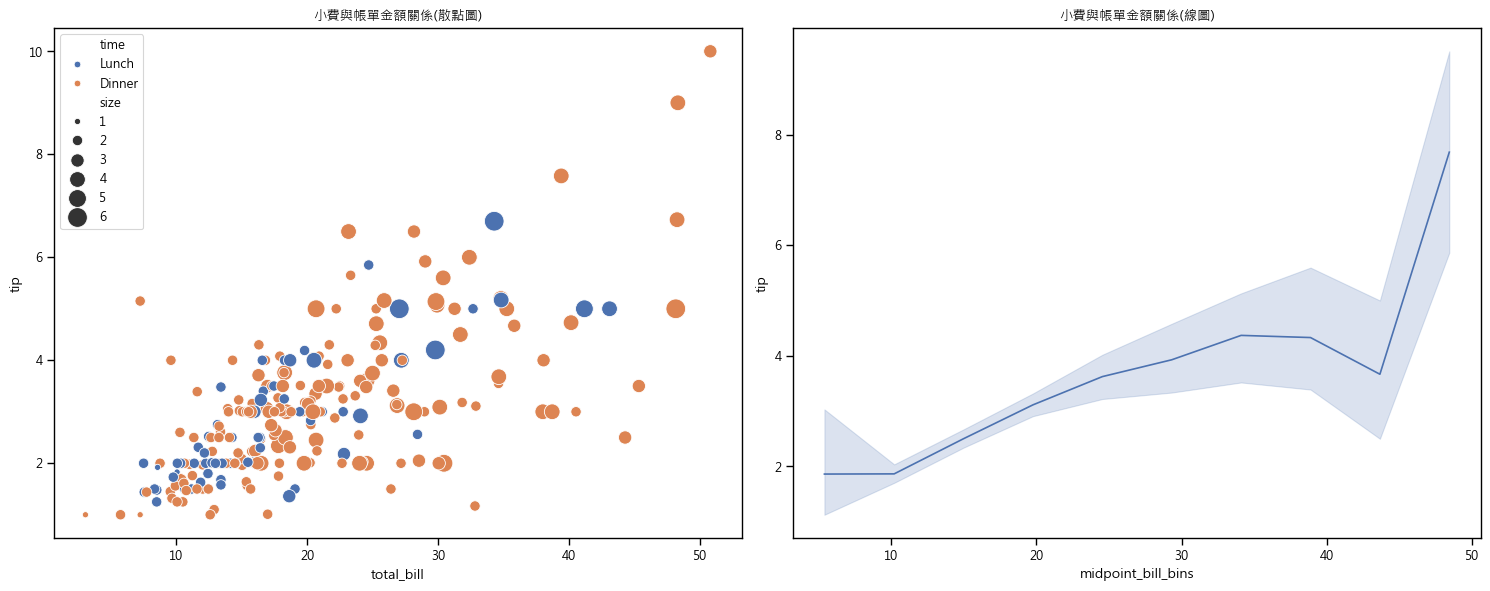

In [124]:
# 2.1 關係圖(Relational plots)

# 使用Tips數據集展示關係圖
plt.figure(figsize=(15, 6))
sns.set_context('paper')
# 散點圖 (scatterplot)
plt.subplot(1, 2, 1)
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time", size="size", sizes=(20, 200))
plt.title('小費與帳單金額關係(散點圖)')

# 線圖 (lineplot)
plt.subplot(1, 2, 2)
# 為了展示線圖，先按total_bill分組計算平均小費
mean_tips = tips.groupby('bill_bins')["total_bill"].mean().reset_index()


def midpoint_bill_bins(s):
    s_clean = s.strip('()[]')
    start, end = map(float, s_clean.split(','))
    midpoint = (start + end) / 2
    return midpoint


tips["midpoint_bill_bins"] = tips["bill_bins"].apply(midpoint_bill_bins)

tips

sns.lineplot(data=tips, x="midpoint_bill_bins", y="tip")
plt.title('小費與帳單金額關係(線圖)')

plt.tight_layout()
plt.show()

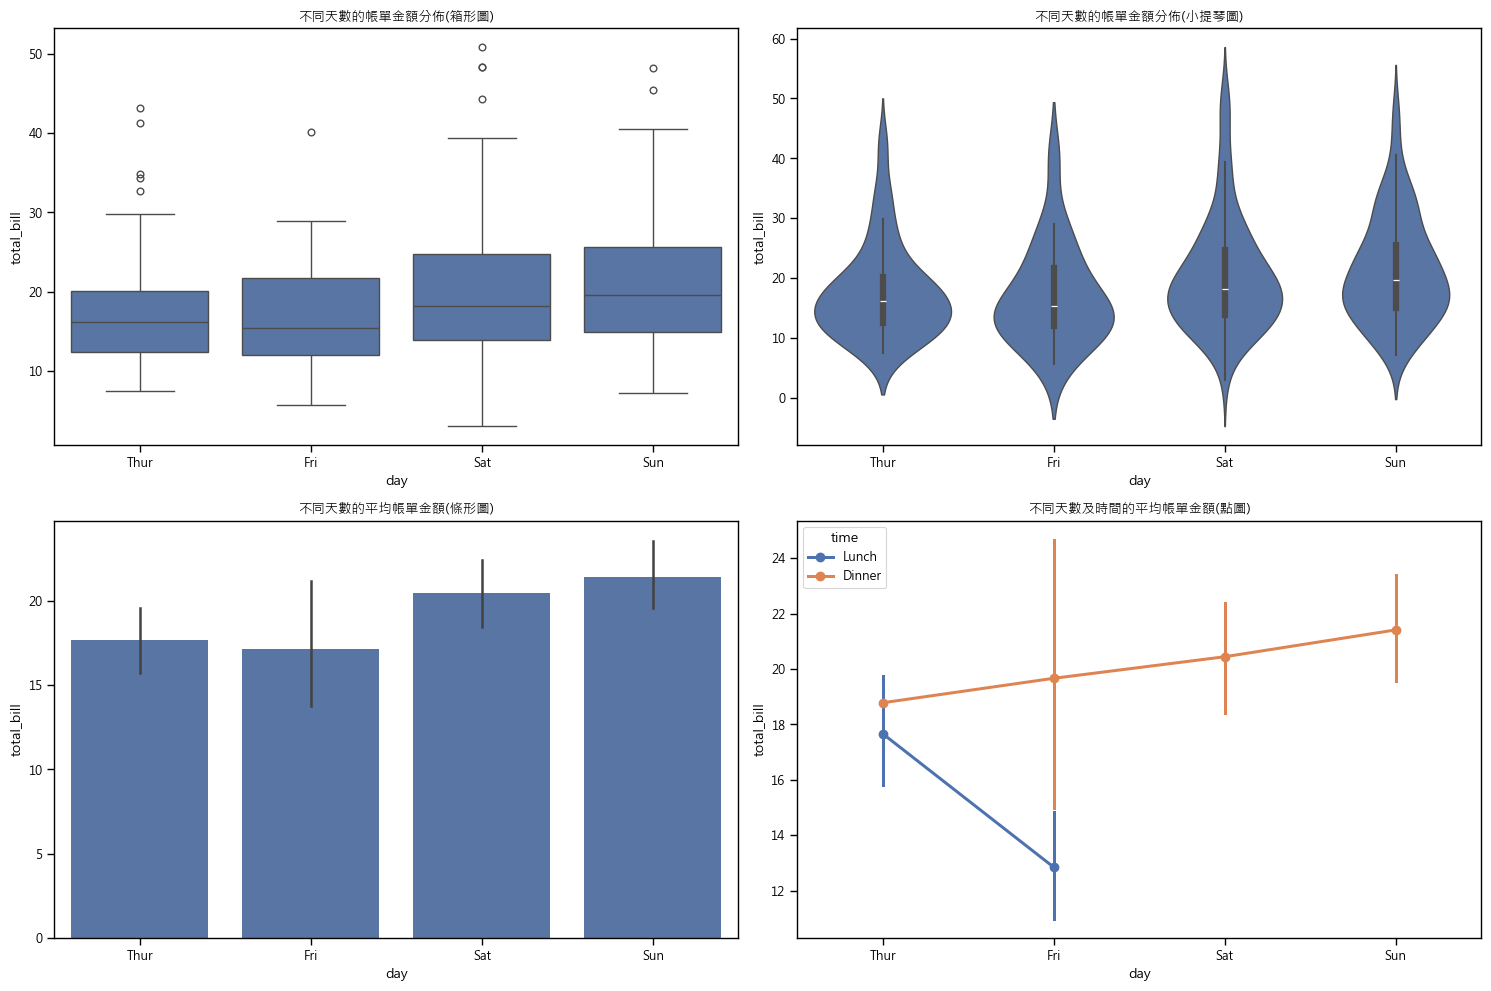

In [125]:
# 2.2 分類圖(Categorical plots)

plt.figure(figsize=(15, 10))

# 箱形圖 (boxplot)
plt.subplot(2, 2, 1)
sns.boxplot(data=tips, x="day", y="total_bill")
plt.title('不同天數的帳單金額分佈(箱形圖)')

# 小提琴圖 (violinplot)
plt.subplot(2, 2, 2)
sns.violinplot(data=tips, x="day", y="total_bill")
plt.title('不同天數的帳單金額分佈(小提琴圖)')

# 條形圖 (barplot)
plt.subplot(2, 2, 3)
sns.barplot(data=tips, x="day", y="total_bill")
plt.title('不同天數的平均帳單金額(條形圖)')

# 帶有條帽的條形圖 (pointplot)
plt.subplot(2, 2, 4)
sns.pointplot(data=tips, x="day", y="total_bill", hue="time")
plt.title('不同天數及時間的平均帳單金額(點圖)')

plt.tight_layout()
plt.show()

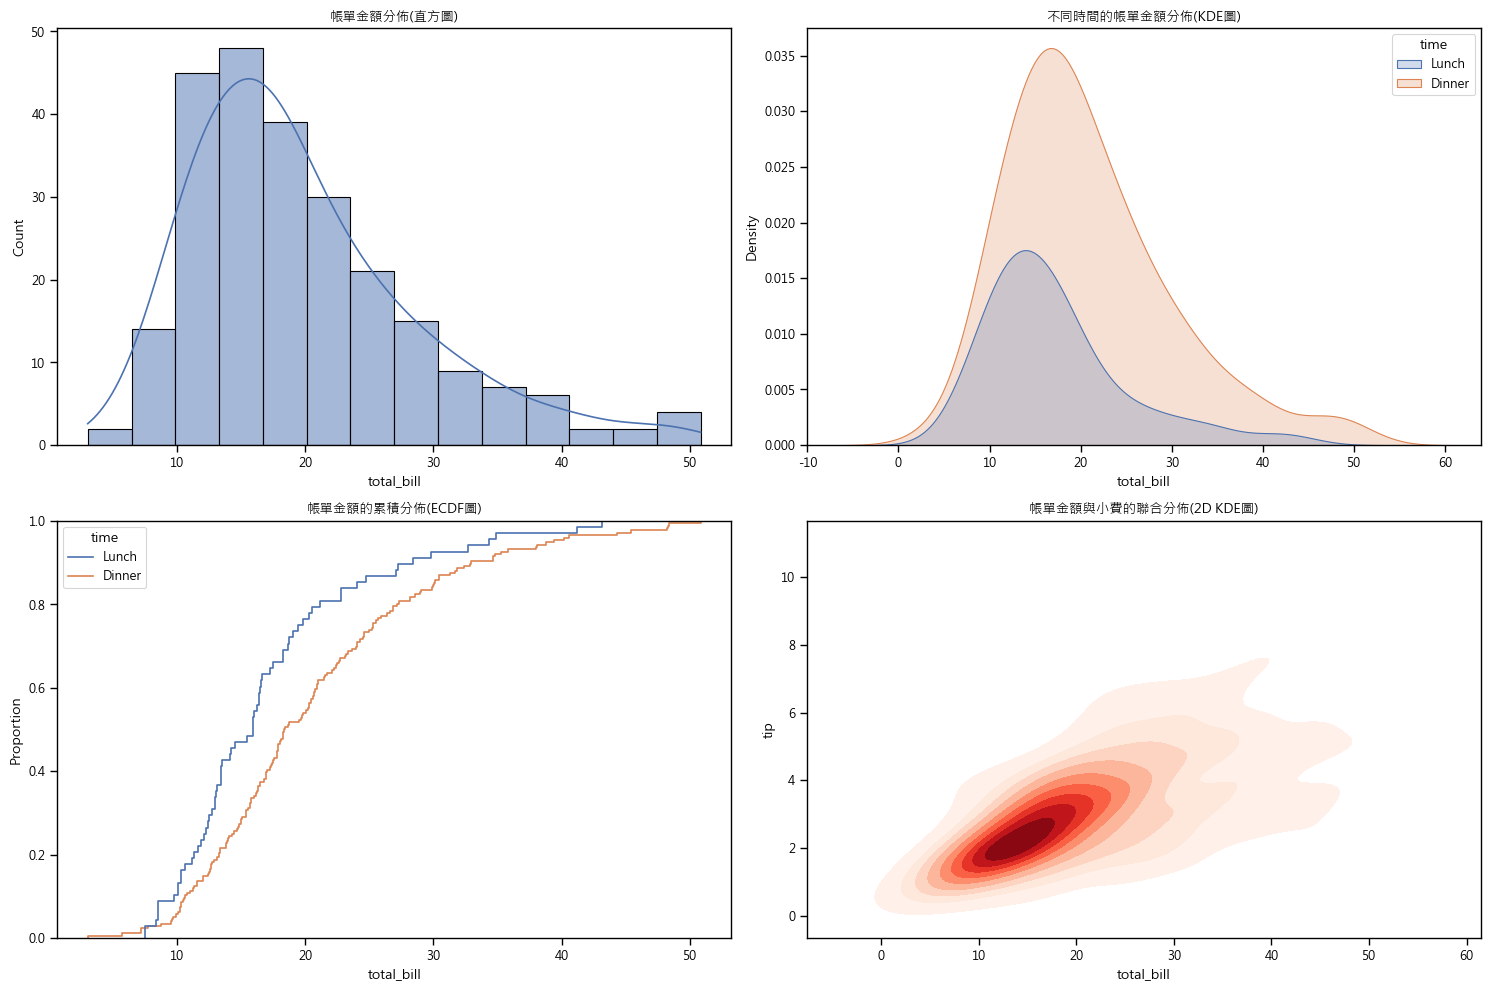

In [126]:
# 2.3 分佈圖(Distribution plots)

plt.figure(figsize=(15, 10))

# 直方圖 (histplot)
plt.subplot(2, 2, 1)
sns.histplot(data=tips, x="total_bill", kde=True)
plt.title('帳單金額分佈(直方圖)')

# 核密度估計圖 (kdeplot)
plt.subplot(2, 2, 2)
sns.kdeplot(data=tips, x="total_bill", hue="time", fill=True)
plt.title('不同時間的帳單金額分佈(KDE圖)')

# 經驗累積分佈函數 (ecdfplot)
plt.subplot(2, 2, 3)
sns.ecdfplot(data=tips, x="total_bill", hue="time")
plt.title('帳單金額的累積分佈(ECDF圖)')

# 2D KDE圖
plt.subplot(2, 2, 4)
sns.kdeplot(data=tips, x="total_bill", y="tip", cmap="Reds", fill=True)
plt.title('帳單金額與小費的聯合分佈(2D KDE圖)')

plt.tight_layout()
plt.show()

<Figure size 1200x1000 with 0 Axes>

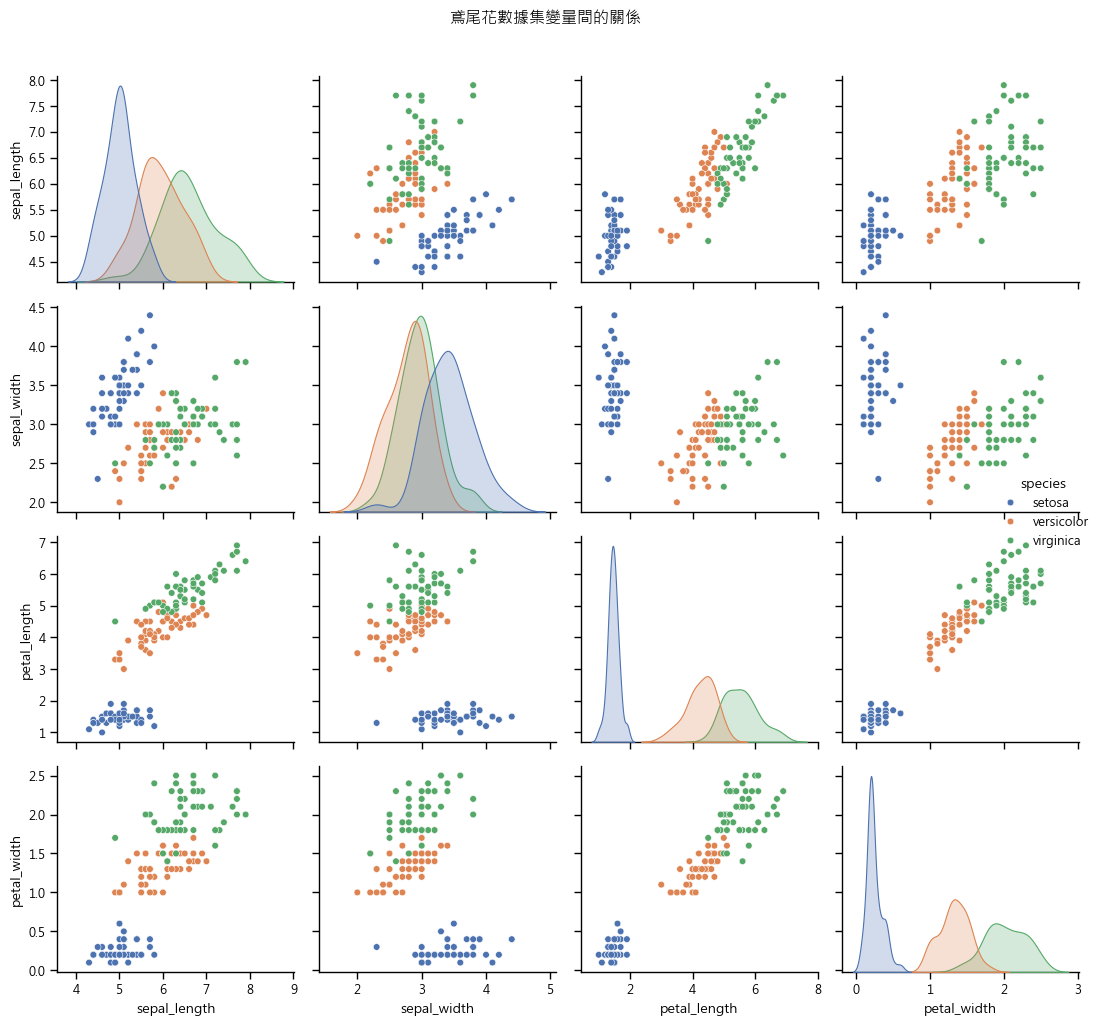

<Figure size 1200x1000 with 0 Axes>

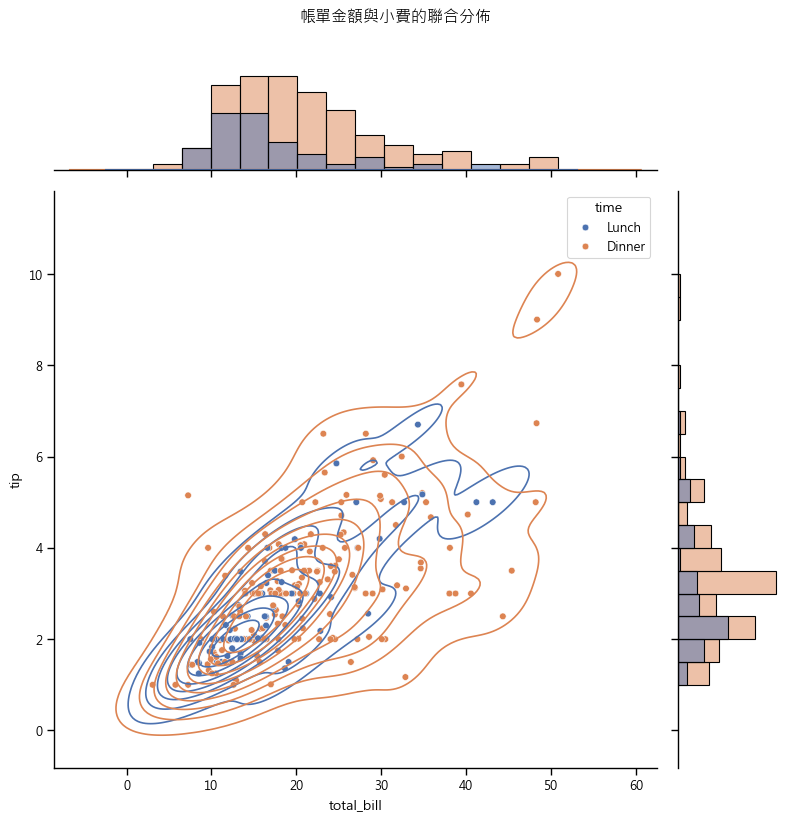

In [127]:
# 2.4 多變量分佈展示

# 配對圖(Pairplot)：展示數據集中變量間的關係
plt.figure(figsize=(12, 10))
sns.pairplot(data=iris, hue="species", diag_kind="kde")
plt.suptitle('鳶尾花數據集變量間的關係', y=1.02)
plt.tight_layout()
plt.show()

# 聯合分佈圖(Jointplot)：展示兩個變量的聯合分佈
plt.figure(figsize=(12, 10))
g = sns.jointplot(data=tips, x="total_bill", y="tip", hue="time", 
                  kind="kde", height=8)
g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.histplot)
plt.suptitle('帳單金額與小費的聯合分佈', y=1.02)
plt.tight_layout()
plt.show()


## 📊 3. Seaborn 高級統計圖表

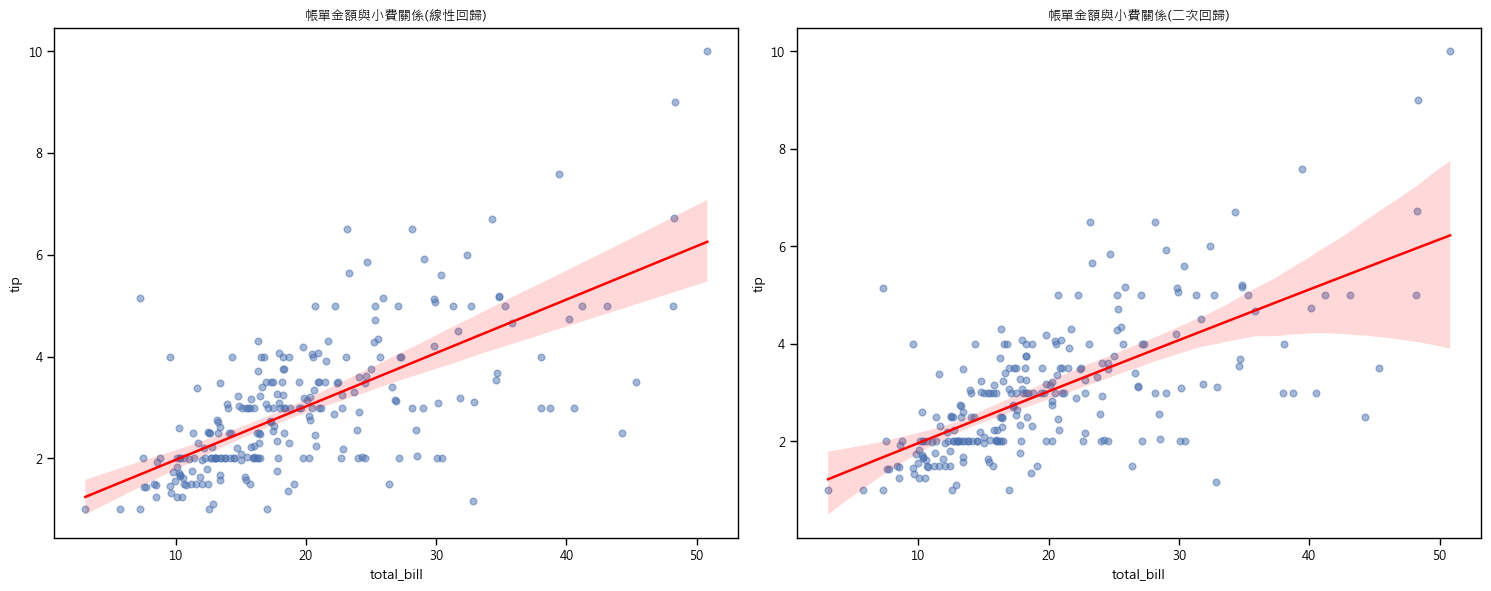

In [128]:
# 3.1 回歸圖(Regression plots)

# 散點圖搭配回歸線
plt.figure(figsize=(15, 6))

# 線性回歸 (regplot)
plt.subplot(1, 2, 1)
sns.regplot(data=tips, x="total_bill", y="tip", 
            scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.title('帳單金額與小費關係(線性回歸)')

# 多項式回歸 (regplot with order parameter)
plt.subplot(1, 2, 2)
sns.regplot(data=tips, x="total_bill", y="tip", order=2,
            scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.title('帳單金額與小費關係(二次回歸)')

plt.tight_layout()
plt.show()

<Figure size 1200x1000 with 0 Axes>

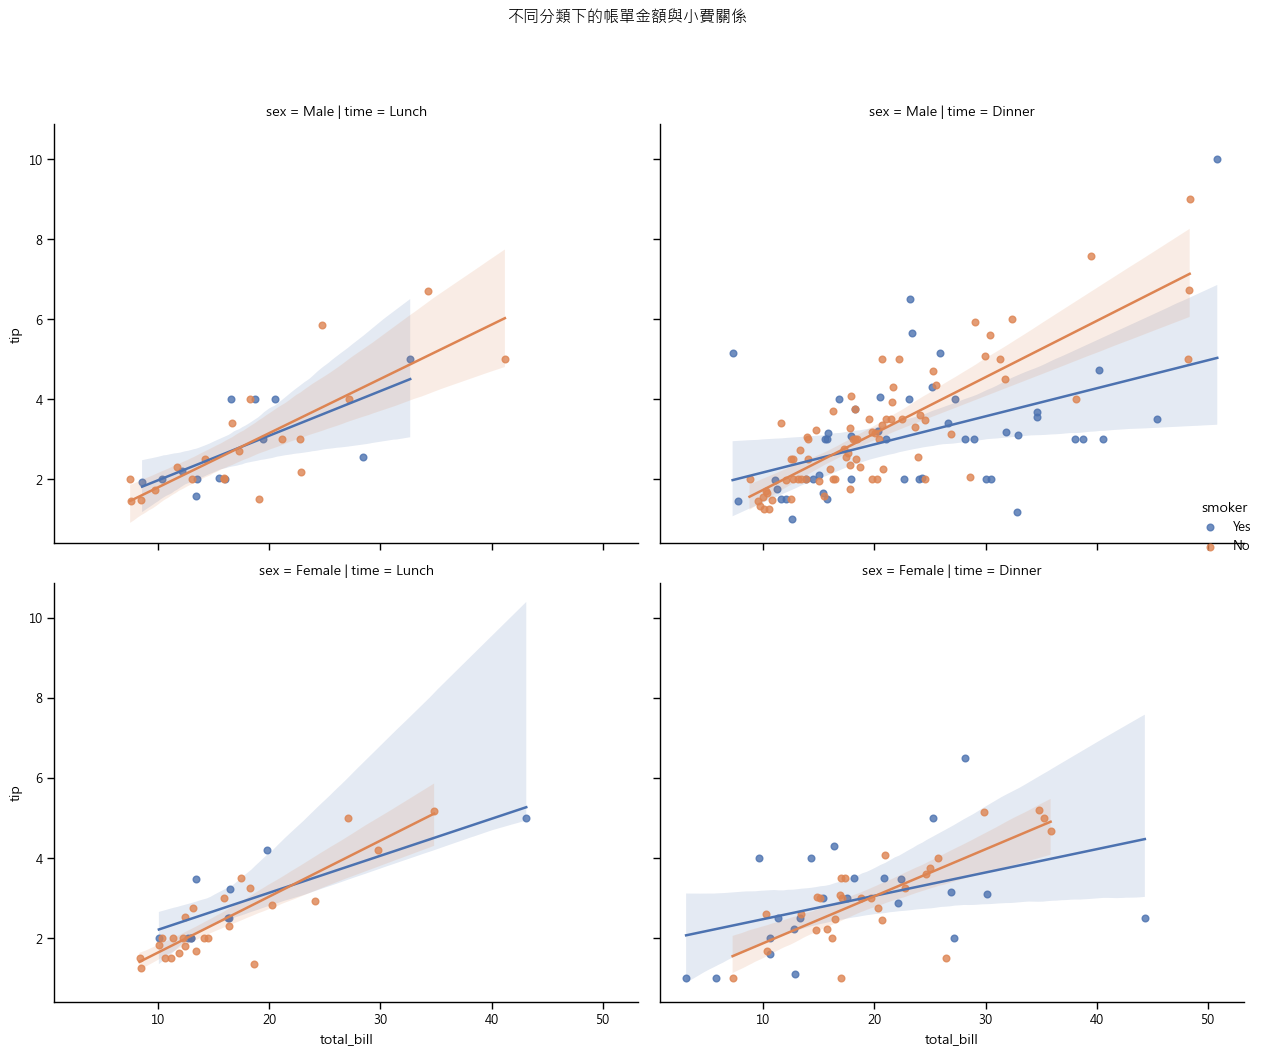

In [129]:
# 3.2 lmplot: 結合回歸和分類變量

plt.figure(figsize=(12, 10))
sns.lmplot(data=tips, x="total_bill", y="tip", col="time", row="sex", 
           hue="smoker", height=5, aspect=1.2)
plt.suptitle('不同分類下的帳單金額與小費關係', y=1.05)
plt.tight_layout()
plt.show()

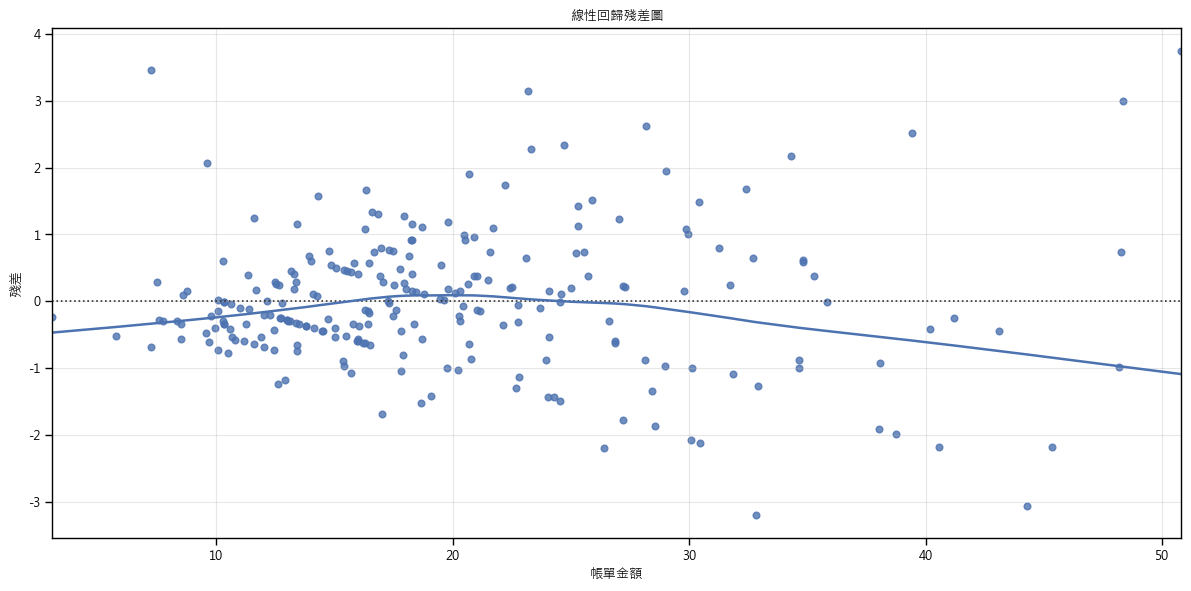

In [130]:
# 3.3 殘差圖(Residplot): 檢查回歸模型的適合度

plt.figure(figsize=(12, 6))
sns.residplot(data=tips, x="total_bill", y="tip", lowess=True)
plt.title('線性回歸殘差圖')
plt.xlabel('帳單金額')
plt.ylabel('殘差')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

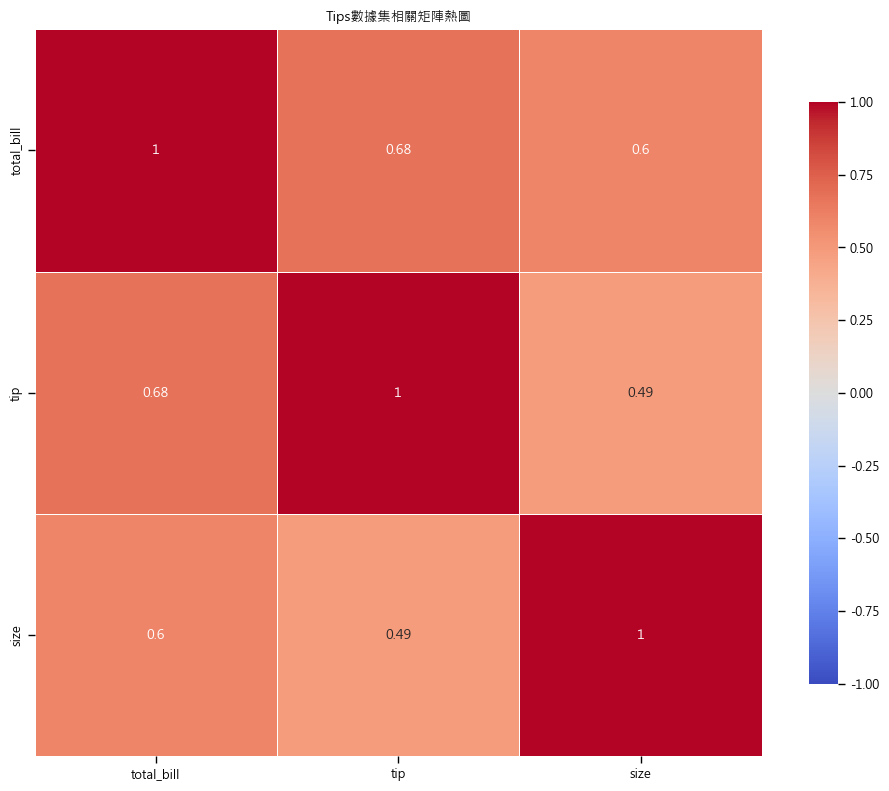

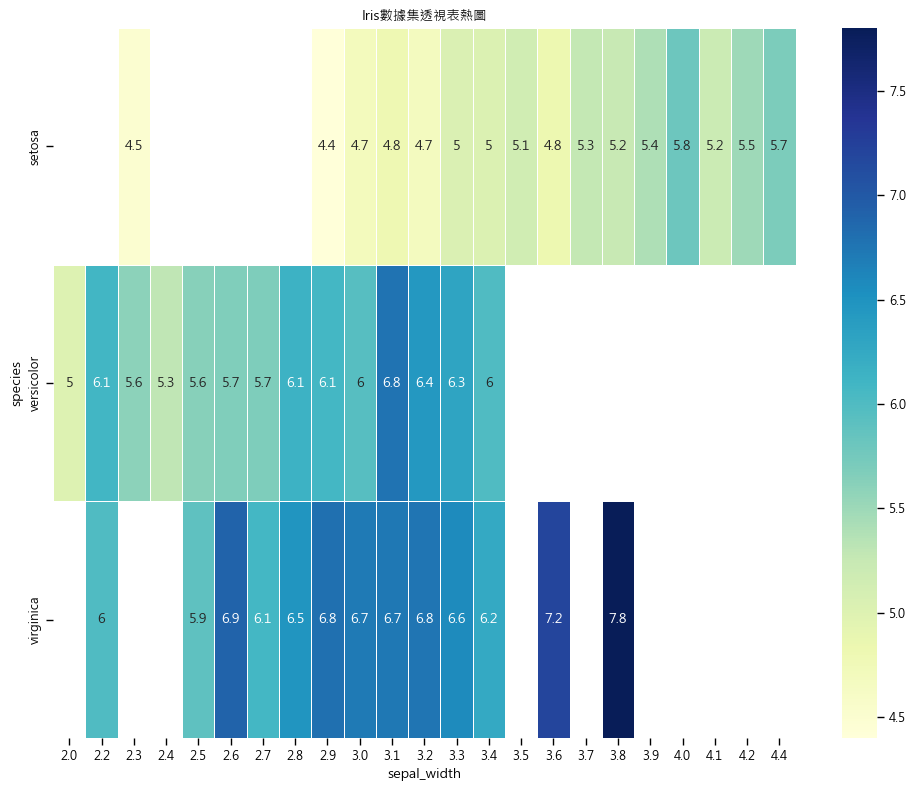

In [136]:
# 3.4 熱圖(Heatmap): 數據矩陣的可視化

# 創建相關矩陣
corr_matrix = tips[["total_bill", "tip", "size"]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, 
            vmin=-1, vmax=1, center=0, square=True, cbar_kws={"shrink": .8})
plt.title('Tips數據集相關矩陣熱圖')
plt.tight_layout()
plt.show()

# 使用Iris數據集創建數據透視表
iris_pivot = iris.pivot_table(index="species", columns="sepal_width", values="sepal_length", aggfunc='mean')

plt.figure(figsize=(10, 8))
sns.heatmap(iris_pivot, annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title('Iris數據集透視表熱圖')
plt.tight_layout()
plt.show()

<Figure size 1200x1000 with 0 Axes>

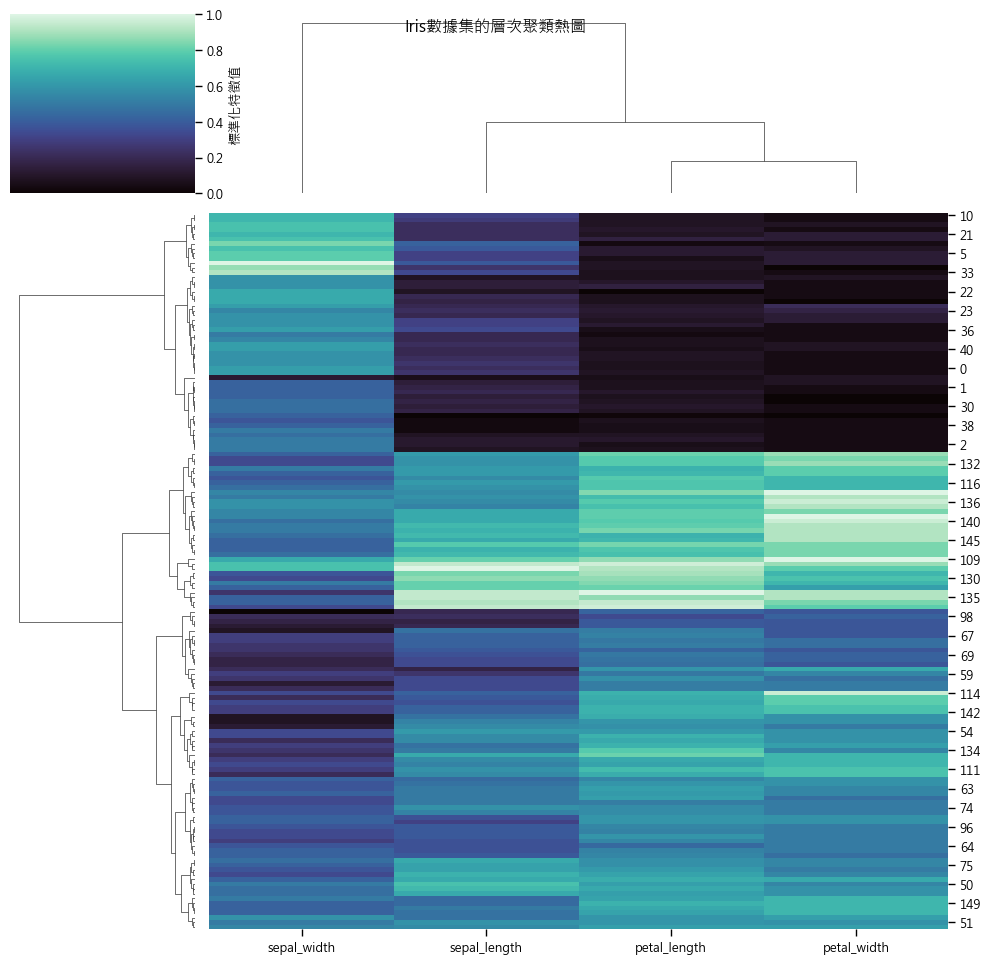

In [137]:
# 3.5 簇狀熱圖(Clustermap): 帶有層次聚類的熱圖

# 使用Iris數據集的數值列創建數據集
iris_features = iris.drop("species", axis=1)

plt.figure(figsize=(12, 10))
sns.clustermap(iris_features, figsize=(10, 10), cmap="mako", 
               standard_scale=1, method="ward", 
               cbar_kws={"label": "標準化特徵值"})
plt.suptitle('Iris數據集的層次聚類熱圖', y=0.95)
plt.tight_layout()
plt.show()


## 📊 4. Seaborn 高級自定義與複雜圖表

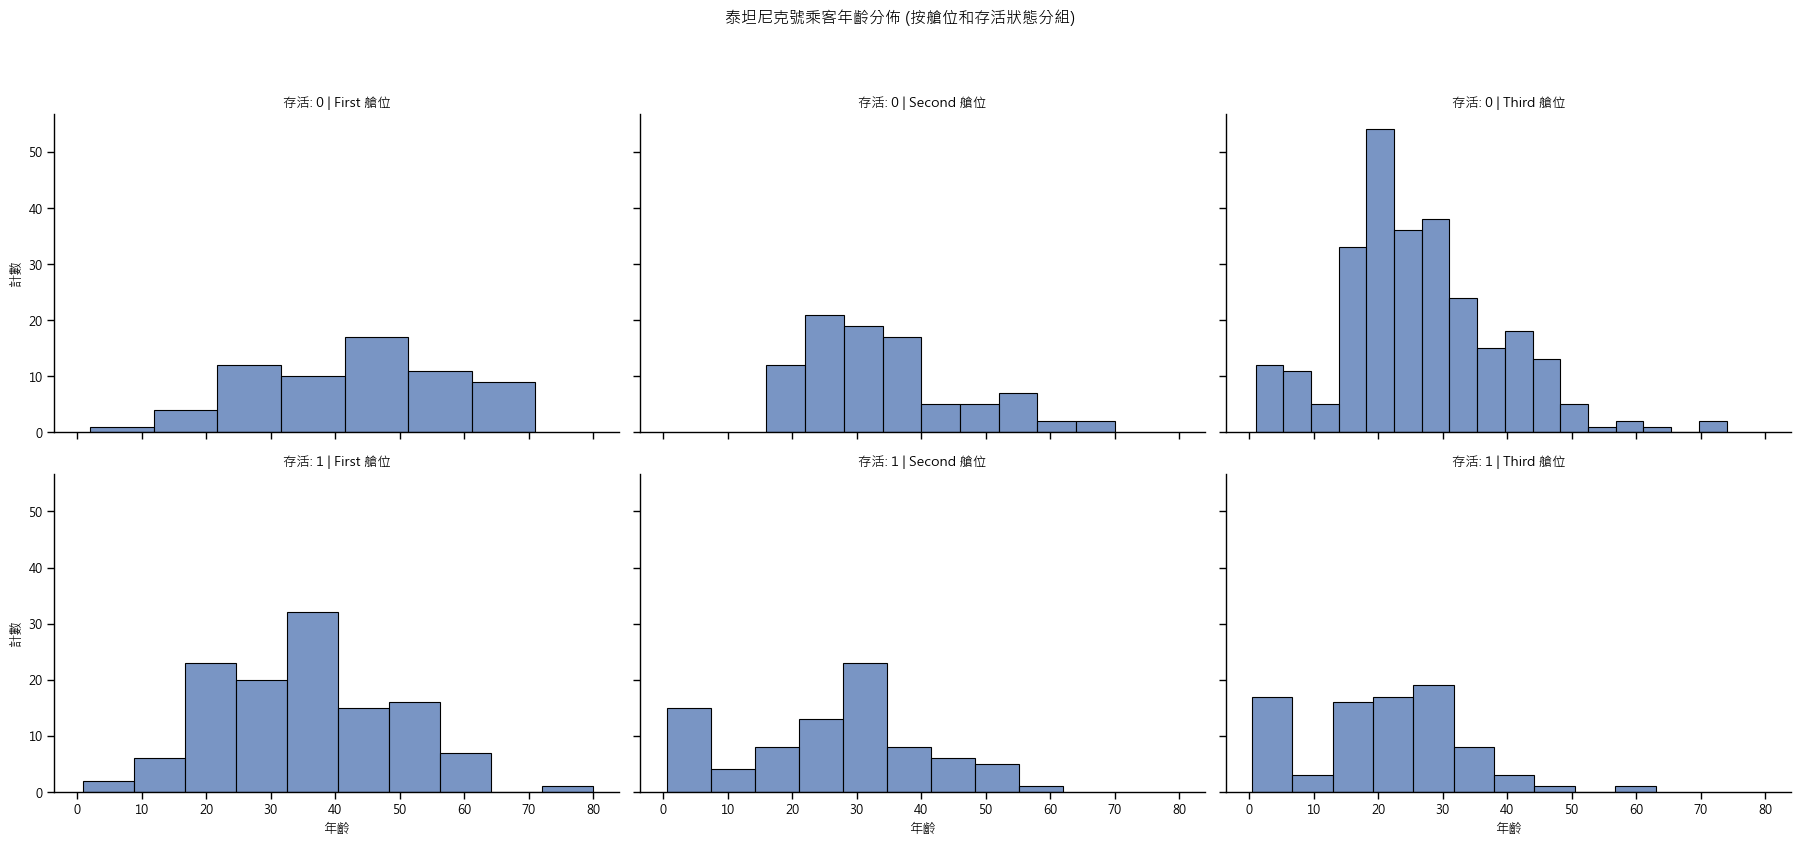

In [138]:
# 4.1 FacetGrid: 多面板繪圖

# 使用Titanic數據集
g = sns.FacetGrid(titanic, col="class", row="survived", height=4, aspect=1.5)
g.map_dataframe(sns.histplot, x="age")
g.set_axis_labels("年齡", "計數")
g.set_titles(col_template="{col_name} 艙位", row_template="存活: {row_name}")
g.fig.suptitle('泰坦尼克號乘客年齡分佈 (按艙位和存活狀態分組)', y=1.05)
g.add_legend()
plt.tight_layout()
plt.show()

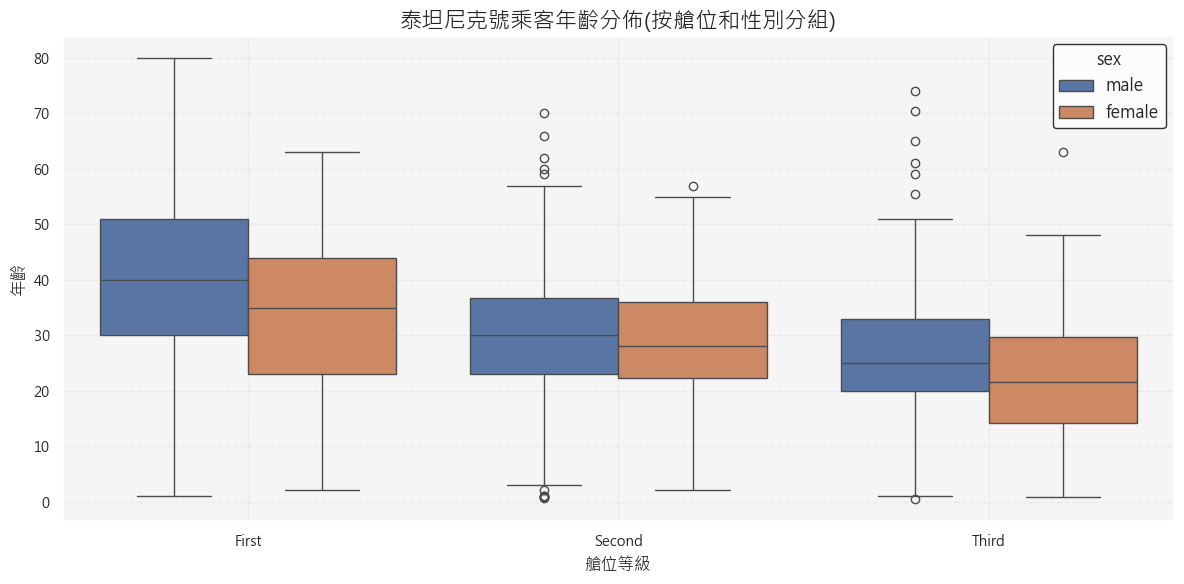

In [140]:
# 4.2 主題定製: 高度自定義Seaborn圖表風格

# 設置自定義風格參數
custom_params = {
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.alpha": 0.7,
    "grid.color": "#cccccc",
    "axes.facecolor": "#f5f5f5",
    "figure.facecolor": "white",
    "axes.labelsize": 12,
    "axes.titlesize": 16,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "legend.fontsize": 12,
    "legend.frameon": True,
    "legend.framealpha": 0.8,
    "legend.edgecolor": "black",
    "legend.facecolor": "white"
}
sns.set_theme(style="darkgrid", palette="deep", rc=custom_params)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 避免負號亂碼

# 使用自定義主題繪製圖表
plt.figure(figsize=(12, 6))
sns.boxplot(data=titanic, x="class", y="age", hue="sex")
plt.title('泰坦尼克號乘客年齡分佈(按艙位和性別分組)')
plt.xlabel('艙位等級')
plt.ylabel('年齡')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 恢復預設主題
sns.set_theme()

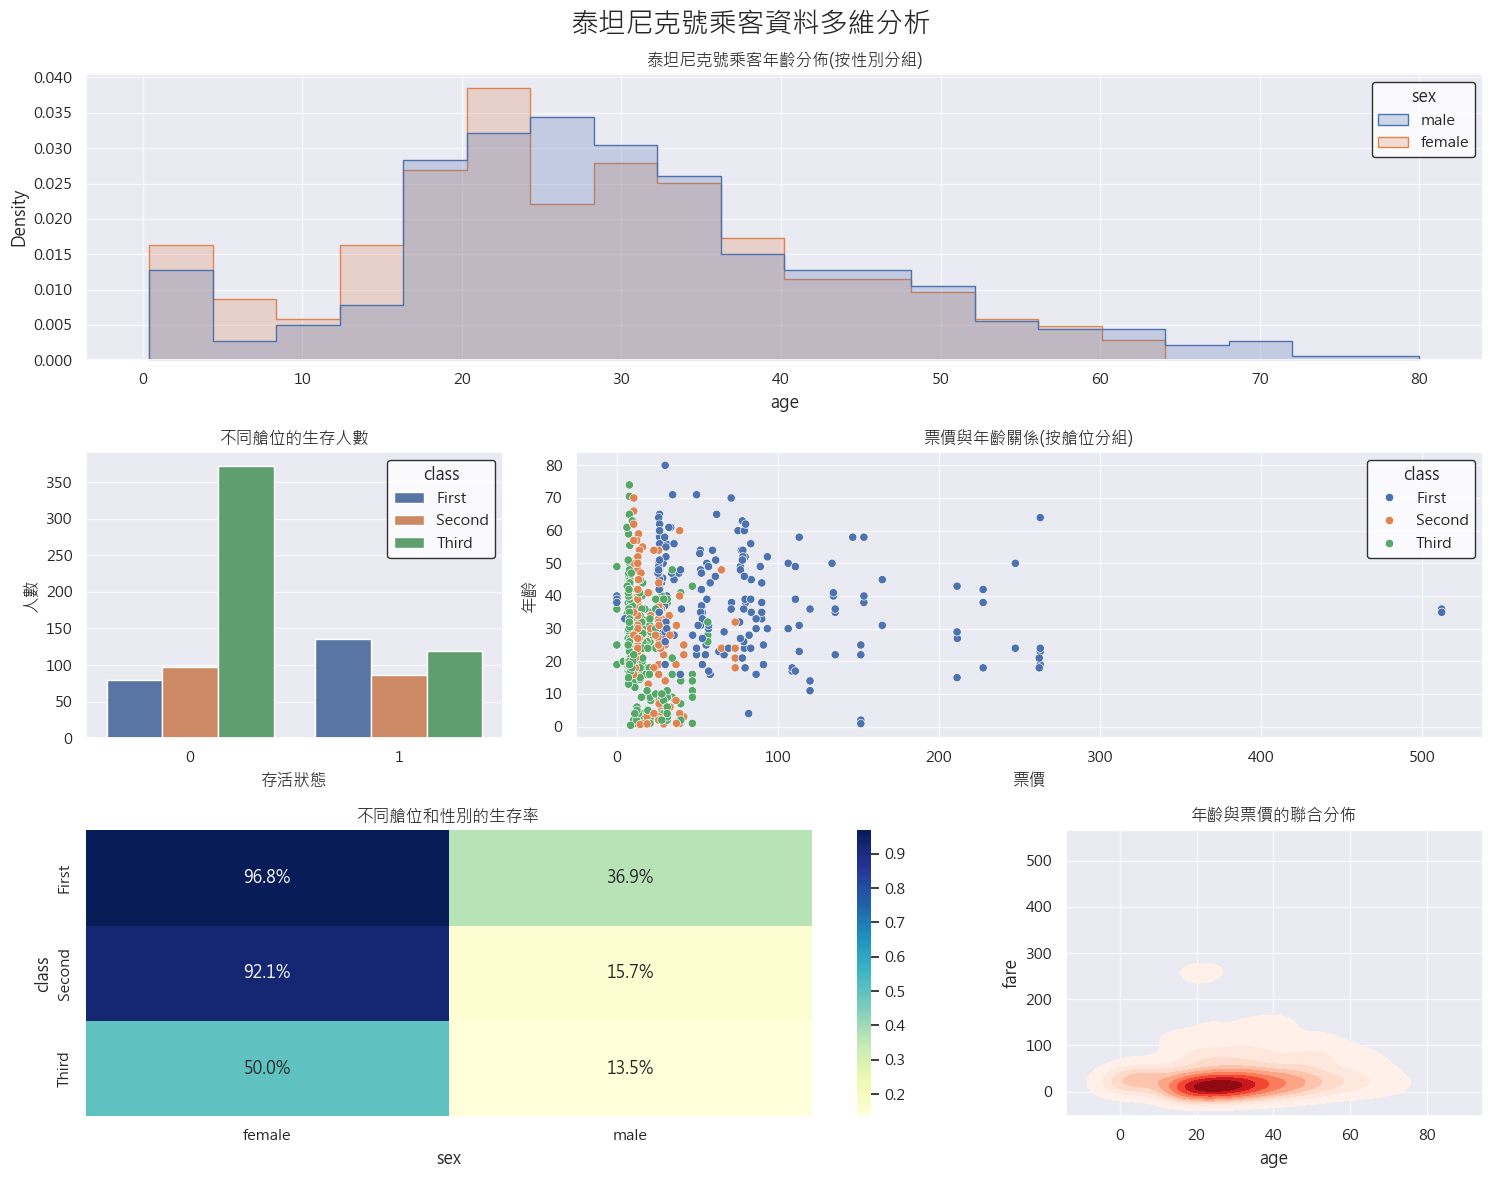

In [143]:
# 4.3 複合圖表: 組合多種Seaborn和Matplotlib圖表

# 創建一個複合圖表，結合多種類型的可視化
fig = plt.figure(figsize=(15, 12))

# 創建網格佈局
gs = fig.add_gridspec(3, 3)

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 避免負號亂碼

# 年齡分佈直方圖
ax1 = fig.add_subplot(gs[0, :])
sns.histplot(data=titanic, x="age", hue="sex", element="step", stat="density", common_norm=False, ax=ax1)
ax1.set_title('泰坦尼克號乘客年齡分佈(按性別分組)')

# 生存比例條形圖
ax2 = fig.add_subplot(gs[1, 0])
sns.countplot(data=titanic, x="survived", hue="class", ax=ax2)
ax2.set_title('不同艙位的生存人數')
ax2.set_xlabel('存活狀態')
ax2.set_ylabel('人數')

# 票價與年齡散點圖
ax3 = fig.add_subplot(gs[1, 1:])
sns.scatterplot(data=titanic, x="fare", y="age", hue="class", sizes=(20, 200), ax=ax3)
ax3.set_title('票價與年齡關係(按艙位分組)')
ax3.set_xlabel('票價')
ax3.set_ylabel('年齡')

# 不同艙位和性別的生存率熱圖
survival_rates = titanic.pivot_table(index="class", columns="sex", values="survived", aggfunc="mean")
ax4 = fig.add_subplot(gs[2, 0:2])
sns.heatmap(survival_rates, annot=True, fmt=".1%", cmap="YlGnBu", ax=ax4)
ax4.set_title('不同艙位和性別的生存率')

# 年齡與票價的KDE圖
ax5 = fig.add_subplot(gs[2, 2])
sns.kdeplot(data=titanic, x="age", y="fare", fill=True, cmap="Reds", ax=ax5)
ax5.set_title('年齡與票價的聯合分佈')

plt.suptitle('泰坦尼克號乘客資料多維分析', fontsize=20, y=0.98)
plt.tight_layout()
plt.show()


## 📋 5. 總結


在本課程中，我們探索了Seaborn庫的多種功能和統計圖表：

- **Seaborn基本介紹與風格設置**：我們學習了Seaborn的風格主題、調色板、上下文設置和內建數據集，這些為創建美觀的可視化提供了基礎。

- **基本繪圖函數**：我們掌握了各種關係圖、分類圖和分佈圖的繪製方法，包括散點圖、線圖、箱形圖、小提琴圖和直方圖等。

- **高級統計圖表**：我們深入學習了回歸圖、熱圖、簇狀熱圖等更複雜的統計可視化，這些圖表能夠幫助我們發現和展示數據中的深層統計關係。

- **高級自定義與複雜圖表**：我們探索了FacetGrid、自定義主題和複合圖表的創建，這些技術使我們能夠創建高度定製和豐富的數據視覺化。

Seaborn作為一個專注於統計可視化的庫，與Matplotlib相輔相成，為數據科學家和分析師提供了強大的工具來探索和展示數據。透過本課程學習的技術，您可以創建既美觀又具有統計意義的視覺化，有效地傳達數據中的洞見。